In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

In [24]:
df = pd.read_csv('games.csv') 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se realiza un reemplazo a los nombres de las columnas, se colocaran ern minusculas, esto ayudará a trabajr mejor con ellos.

In [26]:
df.columns = [col.lower() for col in df.columns]

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [27]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Se va a realizar una inspección a la base de datos, para ver si hay datos faltantes.

In [28]:
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Se encuentran demasiados datos faltantes en algunas columnas, esto pudiera ser por que al momento de tomar la información no se capturo correctamente, se omitió en el momento de su recopilación, no se solicitó al departamento encargado, se perdió.

Se realizará una inspección para ver si existen datos duplicados.

In [29]:
df.duplicated().sum()

np.int64(0)

Se colocará '-1' en los datos faltantes de las columnas "critic_score" y "user_score ", esto ayudará a evitar resultados erroneos en el analisis de promedios y estadisticos.

In [30]:
df.loc[:, ['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(-1)
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77          -1.0         -1    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00          -1.0         -1    NaN  


Se colocará "sin clasificación" a los datos faltantes de la columna 'rating' para que no afecte en el momento de realizar analisis diversos como promedios o gráficos

In [31]:
df['rating'] = df['rating'].fillna('sin clasificación')

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,sin clasificación
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,sin clasificación


Se convertirá a enteros la columna 'year_of_release' para una mejor presentación

In [32]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score             rating  
0     28.96      3.77         8.45          76.0          8                  E  
1      3.58      6.81         0.77          -1.0         -1  sin clasificación  
2     12.76      3.79         3.29          82.0        8.3                  E  
3     10.93      3.28         2.95          80.0          8                  E  
4      8.89     10.22         1.00          -1.0         -1  sin clasificación  


Se detecta dentro de la columna 'user_score' una abreviatura "TBD" esta se mantendrá así, no se le realizará nada.

Se realizará el cálculo de las ventas totales en todas las regiones para cada juego y estos valores se colocarán en una nueva columna que se va a llamar 'total_sales' para el posterior trabajo que se realizará con estos datos.

In [33]:
df['total_sales']= df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
total_sales = df['total_sales']
print(total_sales.head())

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64


Se realizará un deglose de los juegos por año de lanzamiento y se iniciará por el año en que más juegos fueron lanzados al mercado.

In [34]:
df_year_of_release = df['year_of_release'].value_counts().sort_values(ascending=False)

print(df_year_of_release)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64


Se va a realizar un desglose para ver que plataforma ha tenido más ventas

In [35]:
total_sales_platform = df.groupby('platform')['total_sales'].sum().reset_index()
total_sales_platform = total_sales_platform.sort_values(by='total_sales', ascending=False)
top_10_platforms = total_sales_platform['platform'].head(10).tolist()

total_sales_platform.head(10)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Se va a realizar un analisis para detectar la duración o actividad que resulta en ventas de las diferentes plataformas, de la más reciente a la más antigua

In [36]:
df = df.dropna(subset=['platform', 'year_of_release'])

platform_active = df.groupby('platform')['year_of_release'].agg(['min','max'])
platform_active['year_activity'] = platform_active['max'] - platform_active['min']
platform_active.columns = ['inicio', 'fin', 'duración']
platform_durability = platform_active.sort_values(by='inicio', ascending=False)

print(platform_durability.head())

          inicio   fin  duración
platform                        
PS4         2013  2016         3
XOne        2013  2016         3
WiiU        2012  2016         4
WS          1999  2001         2
DC          1998  2008        10


Se va a realizar un desglose para ver que plataforma ha tenido más ventas

In [37]:
total_sales_platform = df.groupby('platform')['total_sales'].sum().reset_index()
total_sales_platform = total_sales_platform.sort_values(by='total_sales', ascending=False)
top_10_platforms = total_sales_platform['platform'].head(10).tolist()

print(total_sales_platform.head(10))

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52


Se va a realizar un analisis para detectar la duración o actividad que resulta en ventas de las diferentes plataformas, de la más reciente a la más antigua

In [38]:
platform_active = df.groupby('platform')['year_of_release'].agg(year_start='min', year_end='max')
platform_active['year_activity'] = platform_active['year_end'] - platform_active['year_start']
platform_durability = platform_active.sort_values(by='year_start', ascending=False)
print(platform_durability)


          year_start  year_end  year_activity
platform                                     
PS4             2013      2016              3
XOne            2013      2016              3
WiiU            2012      2016              4
WS              1999      2001              2
DC              1998      2008             10
PCFX            1996      1996              0
TG16            1995      1995              0
SAT             1994      1999              5
3DO             1994      1995              1
NG              1993      1996              3
SCD             1993      1994              1
GG              1992      1992              0
SNES            1990      1999              9
GEN             1990      1994              4
NES             1983      1994             11
PC                 0      2016           2016
N64                0      2002           2002
GC                 0      2007           2007
2600               0      1989           1989
3DS                0      2016    

Identificar plataformas que solían ser populares pero ahora tienen ventas nulas

In [39]:
active_platforms = df[df['year_of_release'] >= 2016]['platform'].unique()  
inactive_platforms = total_sales_platform[~total_sales_platform['platform'].isin(active_platforms)]

print(inactive_platforms)  

   platform  total_sales
16      PS2      1255.77
4        DS       806.12
15       PS       730.86
6       GBA       317.85
19      PSP       294.05
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
0      2600        96.98
21      SAT        33.59
8       GEN        30.77
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


Se va a realizar un desglose para conocer las plataformas con mas juegos

In [40]:
df_platform = df['platform'].value_counts().sort_values(ascending=False)

df_platform.head()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: count, dtype: int64

Se hará un estudio de las 10 plataformas con mayor venta actualmente

In [41]:
top_platforms = total_sales_platform.head(10)['platform'].tolist()
df_top = df[df['platform'].isin(top_platforms)]
sales_by_platform = df_top.groupby('platform')['total_sales'].sum()
sales_by_platform.head()

platform
DS      806.12
GBA     317.85
PC      259.52
PS      730.86
PS2    1255.77
Name: total_sales, dtype: float64

Haremos un grafico de Disperción para observar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular, y  calcular la correlación entre las reseñas y las ventas. 

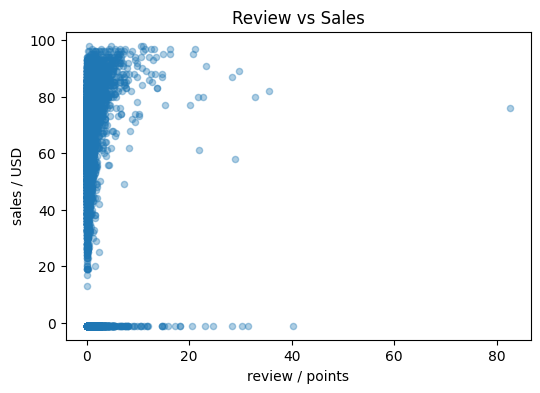

In [42]:
df.plot(title="Review vs Sales",
        x='total_sales', 
        y='critic_score',
        kind='scatter', 
        figsize=[6, 4],
        alpha =0.36,
        xlabel="review / points", ylabel="sales / USD", ) 
plt.show()

Se usará el sistema de Spearman para ver si existe una correlación entre las puntuaciones de la critica y las ventas de videojuegos

In [43]:
df[['total_sales','critic_score']].corr(method = 'spearman')

,total_sales,critic_score
total_sales,1.000000,0.315988
critic_score,0.315988,1.000000


Utilizaremos el sistema de Pearson como medida adicional en el estudio de la correlación

In [44]:
rs_corr = (df['total_sales'].corr(df['critic_score']))

print(rs_corr)

0.14801226557278335


"Después de realizar pruebas para investigar si existe una relación entre las críticas que recibe un videojuego y sus ventas, los resultados sugieren que, en general, a mejores críticas corresponden mayores ventas. Sin embargo, también existen títulos populares que logran altas cifras de ventas independientemente de la evaluación crítica. En resumen, las críticas influyen, pero no son el único factor que determina el éxito comercial de un videojuego."

Se realizará una comparación de las ventas del mismo videojuego pero en diferente plataforma

In [45]:
sales_for_game = df.groupby(['name','platform'])['total_sales'].sum().reset_index()
print(sales_for_game.head(10))


                                      name platform  total_sales
0                           Beyblade Burst      3DS         0.03
1                        Fire Emblem Fates      3DS         1.67
2                     Frozen: Olaf's Quest      3DS         0.59
3                     Frozen: Olaf's Quest       DS         0.51
4               Haikyu!! Cross Team Match!      3DS         0.04
5                        Tales of Xillia 2      PS3         0.84
6                              '98 Koshien       PS         0.40
7               .hack//G.U. Vol.1//Rebirth      PS2         0.17
8             .hack//G.U. Vol.2//Reminisce      PS2         0.23
9  .hack//G.U. Vol.2//Reminisce (jp sales)      PS2         0.16


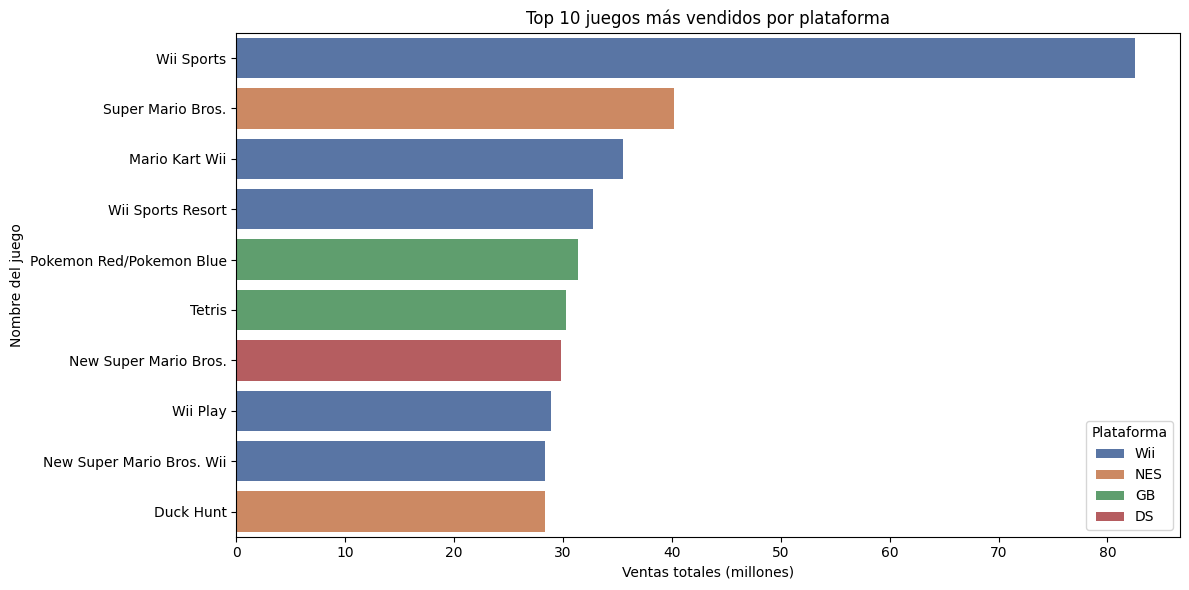

In [46]:
top_sales = sales_for_game.sort_values(by='total_sales', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_sales,
    x='total_sales',
    y='name',
    hue='platform',
    palette='deep'
)

plt.title('Top 10 juegos más vendidos por plataforma')
plt.xlabel('Ventas totales (millones)')
plt.ylabel('Nombre del juego')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()
